a short intro.

i've decided to upload this updated version of my homework after the deadline, because i've finally figured out how to deal with punctuation (thanks to my classmates and thorough googling). i've been trying to solve this problem for two days which was driving me nuts and bananas and so, as i was getting closer to the deadline, i decided to send in the version with punctuation because, to be completely honest, i was too tired and angry with myself to do anything anymore. however, the lady luck had finally smiled upon me (bad timing, lady, but beggars can't be choosers, i suppose...), because i have at last found the piece of code that would rid me of punctuation for good. the deed was finally done, and so i got curious about the changes it might've made to the model.

i implied in the first version of my hometask that maybe model_hobbit could've performed better without that whole "noise", so, now that i have the opportunity to see for myself if that's true, i decided to feed this new data to the model and see what's up.

i'm sorry if it causes trouble when sorting through my files.


oh, by the way, i guess it is against the rules to take into consideration this version while calculating the final grade because 1) it was uploaded far too late; 2) i didn't do it completely alone, as i used the help of my classmates. but it still felt like the right thing to do to share it with professor, so, here it is.

In [2]:
from pymystem3 import Mystem
import re
import gensim
import logging
import nltk.data
import urllib.request
from nltk.corpus import stopwords
from gensim.models import word2vec
from nltk.tokenize import word_tokenize 

import warnings
warnings.filterwarnings('ignore')

from tqdm import tqdm
import nltk

In [29]:
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Kaz\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Kaz\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [3]:
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

In [103]:
### PREPROCESSING, again

with open('hobbit.txt', 'r', encoding='utf8') as f:
    text = f.read()    

text = re.sub(r'[^\w\s]+|[\d]+', r'', text).strip()
word_tokens = word_tokenize(text)

new_lines = []
stopwords = set(stopwords.words('russian'))

for w in word_tokens: 
    if w not in stopwords: 
        new_lines.append(w.lower()) 
        
text2 = new_lines

# the mistake is unexpected and random. everything worked fine, as i've rerun this part several times,
# but now it's angry with me and i don't know why. 

AttributeError: 'set' object has no attribute 'words'

In [6]:
# this part of code that my classmates suggested for me to use does surprisingly quick lemmitizing. 
# just where've you been before?

from joblib import Parallel, delayed

batch_size = 1000
texts = text2

text_batch = [texts[i: i + batch_size] for i in range(0, len(texts), batch_size)]

def lemmatize(text):
    m = Mystem()
    merged_text = "|".join(text)

    doc = []
    res = []

    for t in m.lemmatize(merged_text):
        if t != '|':
            doc.append(t)
        else:
            res.append(doc)
            doc = []

    return res

processed_texts = Parallel(n_jobs=-1)(delayed(lemmatize)(t) for t in tqdm(text_batch))

lemmed_text = processed_texts

100%|██████████████████████████████████████████████████████████████████████████████████| 46/46 [01:28<00:00,  1.93s/it]


In [108]:
# i'm creating a new .txt file here, "hobbit_lemmas", so as not to mess up the "hobbit_lem" one.
# i didn't want to delete it from my computer.
with open('hobbit_lemmas.txt', 'w', encoding='utf8') as f1:
    for batch in lemmed_text:
        for s in batch:
            f1.write(s[0] + '\n')
with open('hobbit_lemmas.txt', 'r', encoding='utf8') as f:
    text_lem = f.read()
print(text_lem) # just to see if it REALLY DID strip the text from punctuation. and converted it into lemmas.

джон
рональд
руэл
толкин
хоббит
туда
и
обратно
глава
нежданный
угощение
в
земля
нора
нора
жить
хоббит
нора
вовсе
грязный
сырой
копошиться
червь
лепиться
стена
слизняк
нора
сухо
тепло
пахнуть
приятно
иметься
приседать
покушать
словом
нора
принадлежать
хоббит
становиться
сам
себя
уютный
отношение
входной
дверь
нора
круглый
точно
люк
сверкать
медный
ручка
посредине
выкрасить
зеленый
цвет
открываться
просторный
длинный
коридор
похожий
пещера
чистый
ничуть
задымить
немой
стоять
стул
пол
устилать
ковер
стена
обшивать
деревянный
панель
оснащать
великий
множество
крючок
плащ
шляпа
хоббит
просто
обожать
принимать
гость
коридор
изгибаться
проходить
глубина
холм
круча
называть
холм
миля
окрест
по
оба
сторона
коридор
ряд
тянуться
маленький
круглый
дверца
который
скрываться
самый
разный
помещение
лазать
наверх
спускаться
вниз
хоббит
приходиться
спальня
ванный
погреб
кладовая
перечесть
кухня
трапезная
гардеробный
нора
иметься
особый
комната
целиком
отводить
одежда
находиться
рядом
любой
комната
попа

In [13]:
### WORD2VEC MODEL

f = 'hobbit_lemmas.txt'
data = gensim.models.word2vec.LineSentence(f)

In [78]:
# new model, new parameters! well, mostly. 
# min_count stayed the same here, i didn't want to lose half of my dictionary.
# with window i decided to risk the high number now that i have a proper model.
# so i chose 8 because i read that it should be used in the semantic analysis,
# and i think this is what im trying to accomplish here.
# i didn't change the size, either. i think it's fine that way.
# (but maybe i'm wrong, i still don't fully understand what 'dimensionality' means)
# and i didn't want to add any new parameters, either. i really think it's good to go.

%time model_hobbit = gensim.models.Word2Vec(data, size=300, window=8, min_count=1)

2020-10-07 22:17:32,998 : INFO : collecting all words and their counts
2020-10-07 22:17:32,999 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2020-10-07 22:17:33,050 : INFO : PROGRESS: at sentence #10000, processed 10000 words, keeping 3417 word types
2020-10-07 22:17:33,126 : INFO : PROGRESS: at sentence #20000, processed 20000 words, keeping 4995 word types
2020-10-07 22:17:33,154 : INFO : PROGRESS: at sentence #30000, processed 30000 words, keeping 6146 word types
2020-10-07 22:17:33,223 : INFO : PROGRESS: at sentence #40000, processed 40000 words, keeping 6995 word types
2020-10-07 22:17:33,244 : INFO : collected 7387 word types from a corpus of 45290 raw words and 45290 sentences
2020-10-07 22:17:33,245 : INFO : Loading a fresh vocabulary
2020-10-07 22:17:33,280 : INFO : effective_min_count=1 retains 7387 unique words (100% of original 7387, drops 0)
2020-10-07 22:17:33,283 : INFO : effective_min_count=1 leaves 45290 word corpus (100% of original 45290,

Wall time: 4.02 s


In [79]:
print(len(model_hobbit.wv.vocab))
# naturally it's less than 12k because all the punctuation is gone. yay!

7387


In [80]:
print(sorted([w for w in model_hobbit.wv.vocab]))
# yes! it works! goodness gracious it works.

['а', 'абажур', 'авось', 'ага', 'азога', 'аккуратно', 'алмаз', 'алозеленый', 'алый', 'альфа', 'амбар', 'аппетит', 'апрель', 'арка', 'армия', 'аромат', 'арфа', 'атака', 'аукать', 'аукцион', 'ах', 'ахнуть', 'ахти', 'б', 'бабочка', 'бабушка', 'бабушкин', 'багрянец', 'багряный', 'байка', 'бакалейщик', 'балахон', 'балбес', 'балин', 'балина', 'балино', 'баловаться', 'банго', 'баое', 'барабан', 'барабанить', 'баран', 'бараний', 'баранина', 'барахло', 'барахтаться', 'барашек', 'бард', 'барда', 'бас', 'баснословный', 'башмак', 'башня', 'баюшкибай', 'бдительно', 'бдительность', 'бег', 'бегать', 'бегом', 'беготня', 'бегство', 'беда', 'бедный', 'бедняга', 'бедолага', 'бедствие', 'беее', 'бежать', 'без', 'безбрежный', 'безветренный', 'безделушка', 'бездельник', 'бездельничать', 'бездонный', 'бездыханный', 'беззаботный', 'беззвучно', 'безлунный', 'безмерно', 'безмятежный', 'безнадежно', 'безнадежный', 'безнаказанный', 'безо', 'безоблачный', 'безопасно', 'безопасность', 'безопасный', 'безопасссность'

In [110]:
### FUNCTIONS

# okay, let's check if everything works as it did before. or maybe even better! i hope it's better.
model_hobbit.wv.most_similar(positive=["бильбо"], topn=5)

[('направлять', 0.21677450835704803),
 ('шкатулка', 0.214603453874588),
 ('условие', 0.2076631784439087),
 ('медведь', 0.20267534255981445),
 ('коротышка', 0.19300110638141632)]

In [111]:
model_hobbit.wv.most_similar(positive=["гном", "бочка"], topn=5)

[('шалфей', 0.2133128046989441),
 ('возиться', 0.21100947260856628),
 ('пресекаться', 0.19992932677268982),
 ('купец', 0.19546794891357422),
 ('спалить', 0.18154925107955933)]

In [109]:
# hmm. this part works... strange. these outputs seem kind of justifiable? but not very predictable.
# and the percentage is quite low, too, which is the strangest thing. perhaps choosing this book wasn't the best idea?
# let's try some new words.
model_hobbit.wv.most_similar(positive=["тролль"], topn=5)

[('чернобородый', 0.21124108135700226),
 ('кол', 0.19522631168365479),
 ('отпугивать', 0.1940310150384903),
 ('свисать', 0.19078409671783447),
 ('догадалисссь', 0.18957829475402832)]

In [83]:
# another example:
model_hobbit.wv.most_similar(positive=["лес"], topn=10)

[('лепешка', 0.21263496577739716),
 ('ведущий', 0.21243485808372498),
 ('мужчина', 0.20125553011894226),
 ('поделиться', 0.2009565234184265),
 ('сваливаться', 0.19020509719848633),
 ('чубук', 0.18453910946846008),
 ('целиться', 0.17855322360992432),
 ('обуревать', 0.17708852887153625),
 ('уплетать', 0.1770727038383484),
 ('уродец', 0.17600174248218536)]

In [116]:
# okay, let's move on to the next function.
model_hobbit.wv.similarity("бильбо", "кольцо")

-0.010019194

In [117]:
model_hobbit.wv.similarity("бильбо", "торбинс")

-0.017895028

In [114]:
# well this was unexpected. i don't quite understand why the numbers are so small...
# let's try another one, less predictable combination
model_hobbit.wv.similarity("эльф", "шея")

-0.03294213

In [115]:
# well at least it's smaller than the previous one...
# let's try one last time.
model_hobbit.wv.similarity("эльф", "гном")

0.017336763

In [ ]:
# huh. perhaps the explanation here is such that it recognizes elves and dwarves as two different races?
# so the number is a little higher that the one with the bilbo and the ring and the bilbo baggins examples, 
# which might be this low because these pairs words aren't used together a lot in the book.

# next function!

In [118]:
model_hobbit.wv.doesnt_match("человек гном эльф щит".split())

'эльф'

In [119]:
# this i didn't expect. let's try another race, then...
model_hobbit.wv.doesnt_match("человек гном хоббит эльф щит".split())

'щит'

In [120]:
# ah, much better. 
model_hobbit.wv.doesnt_match("торин балин глоин чародей".split())

'чародей'

In [ ]:
# this test seems to be working just as well, hooray for model_hobbit!

In [95]:
### VISUALIZATION
# this i still haven't fully figured out how to do.
# first i wanted to feed it my list from one of the results that i got from using the function "doesnt_match",
# but mr snake didn't like it. so i have put all the words manually. 

from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
%matplotlib inline

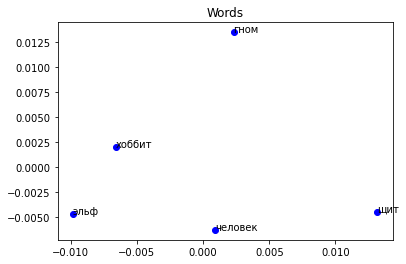

In [97]:
words = ["человек","эльф","гном","хоббит","щит"]
X = model_hobbit[words]
pca = PCA(n_components=2)
coords = pca.fit_transform(X)

plt.scatter(coords[:, 0], coords[:, 1], color='blue')
plt.title('Words')

for i, word in enumerate(words):
    plt.annotate(word, xy=(coords[i, 0], coords[i, 1]))
plt.show()

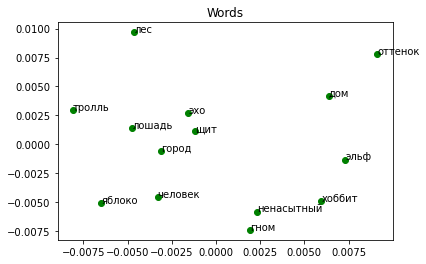

In [131]:
# i think it still looks pretty much the same. what if i put more random words, then?
new_words = ["человек","эльф","гном","хоббит","щит","ненасытный","тролль","оттенок","яблоко","эхо","дом","город","лошадь","лес"]
X = model_hobbit[new_words]
pca = PCA(n_components=2)
coords = pca.fit_transform(X)

plt.scatter(coords[:, 0], coords[:, 1], color='green')
plt.title('Words')

for i, word in enumerate(new_words):
    plt.annotate(word, xy=(coords[i, 0], coords[i, 1]))
plt.show()

In [ ]:
# nope, still looks like a mess to me.
# ideally, i wanted the model to group all the races together, 
# but it didn't manage to do so as well as i'd hoped it would...

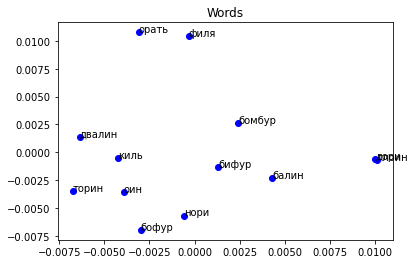

In [125]:
#let's try to put dwarves' names in the model again.
words = ["торин","балин","глоин","бифур","бомбур","бофур","оин","двалин","дори","нори","киль","филя","орать"]
X = model_hobbit[words]
pca = PCA(n_components=2)
coords = pca.fit_transform(X)

plt.scatter(coords[:, 0], coords[:, 1], color='blue')
plt.title('Words')

for i, word in enumerate(words):
    plt.annotate(word, xy=(coords[i, 0], coords[i, 1]))
plt.show()

In [155]:
# again: the lemmatizer messed with the names of two dwarves -- киля and ори, changing them into киль and орать. 
# this time the model performed a little worse, 
# as all the dwarves had dispersed across the graph. 
# good for them to finally get their individual representation in the story, i guess.

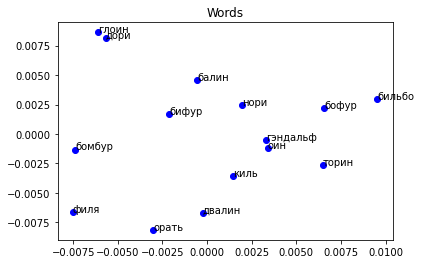

In [101]:
# let's try to add bilbo and gendalf this time, too.
words = ["торин","балин","глоин","бифур","бомбур","бофур","оин","двалин","дори","нори","киль","филя","орать","бильбо","гэндальф"]
X = model_hobbit[words]
pca = PCA(n_components=2)
coords = pca.fit_transform(X)

plt.scatter(coords[:, 0], coords[:, 1], color='blue')
plt.title('Words')

for i, word in enumerate(words):
    plt.annotate(word, xy=(coords[i, 0], coords[i, 1]))
plt.show()

In [ ]:
# this looks a lot worse than before! is it really because the data was insufficient for the model to train from?

TO SUM UP,

this time some parts of the model performed better, but most of them did a worse job than before. i still can't process why exactly did it happen, but my bet is on the data. maybe, if i merged it with the "lord of the rings" trilogy, it could've provided much better results... perhaps i'll test this idea later, once i'm done with all the other deadlines. but for now this is all it can offer, it seems. 

at least now i can finally rest, knowing that i really did all i could this time.